In [ ]:
ARIMA, ARMA , SARIMA are tried in here

In [1]:
import datetime
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

In [3]:
dateparse= lambda dates: pd.datetime.strptime(dates,'%d-%m-%Y')
data=pd.read_csv('Continuous_data.csv',parse_dates=['Date'],date_parser=dateparse,usecols=['Date','India Price'])

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_10948/967972931.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse= lambda dates: pd.datetime.strptime(dates,'%d-%m-%Y')


In [4]:
data.head()

,Date,India Price
0,2005-10-07,240.0
1,2005-10-14,240.0
2,2005-10-21,242.5
3,2005-10-28,242.5
4,2005-11-04,250.0


In [5]:
data.dtypes

Date           datetime64[ns]
India Price           float64
dtype: object

In [6]:
data.index=pd.to_datetime(data['Date'],format='%d-%m-%Y')

In [7]:
data.head()

,Date,India Price
Date,,
2005-10-07,2005-10-07,240.0
2005-10-14,2005-10-14,240.0
2005-10-21,2005-10-21,242.5
2005-10-28,2005-10-28,242.5
2005-11-04,2005-11-04,250.0


In [8]:
data.index

DatetimeIndex(['2005-10-07', '2005-10-14', '2005-10-21', '2005-10-28',
               '2005-11-04', '2005-11-11', '2005-11-18', '2005-11-25',
               '2005-12-02', '2005-12-09',
               ...
               '2021-02-19', '2021-02-26', '2021-03-05', '2021-03-12',
               '2021-03-19', '2021-03-26', '2021-04-02', '2021-04-09',
               '2021-04-16', '2021-04-23'],
              dtype='datetime64[ns]', name='Date', length=796, freq=None)

In [9]:
del data['Date']

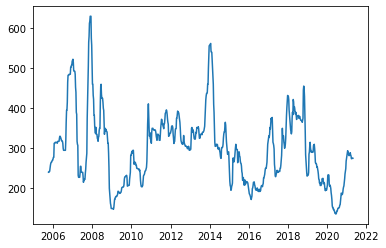

In [10]:
plt.plot(data.index, data['India Price'] )

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(data,period=1)

In [12]:
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

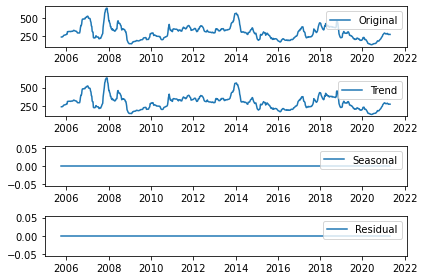

In [13]:
plt.subplot(411)
plt.plot(data,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')
plt.tight_layout()

In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
adftest=adfuller(data)
print("p-value:",adftest[1])

p-value: 0.00013187182416350931


In [16]:
 train=data[data.index<pd.to_datetime("01-11-2018",format='%d-%m-%Y')]
 test=data[data.index>pd.to_datetime("01-11-2018",format='%d-%m-%Y')]

In [17]:
len(train)

670

In [18]:
train.head()

,India Price
Date,
2005-10-07,240.0
2005-10-14,240.0
2005-10-21,242.5
2005-10-28,242.5
2005-11-04,250.0


In [19]:
test.head()

,India Price
Date,
2018-11-02,430.0
2018-11-09,390.0
2018-11-16,340.0
2018-11-23,284.0
2018-11-30,267.0


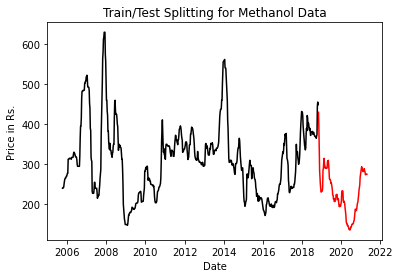

In [20]:
plt.plot(train,color='black')
plt.plot(test,color='red')
plt.xlabel('Date')
plt.ylabel('Price in Rs.')
plt.title('Train/Test Splitting for Methanol Data')
plt.show()

In [21]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

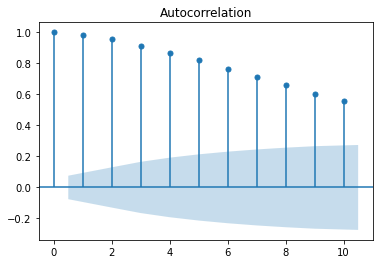

In [22]:
acf_plot=plot_acf(train,lags=10) 

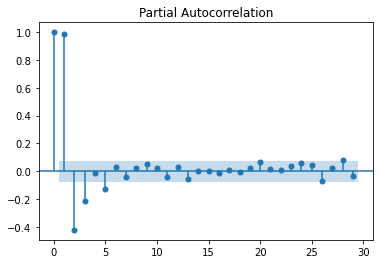

In [23]:
pacf_plot=plot_pacf(train) 

In [24]:

ARIMAmodel = ARIMA(train, order = (1, 0, 1))
ARIMAmodel = ARIMAmodel.fit()
pred_arima=ARIMAmodel.predict(start=len(train),end=(len(data)-1))
pred_arima.index=test.index

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequen

In [25]:
pred_arima.head()

Date
2018-11-02    445.935067
2018-11-09    443.232471
2018-11-16    440.586258
2018-11-23    437.995250
2018-11-30    435.458296
dtype: float64

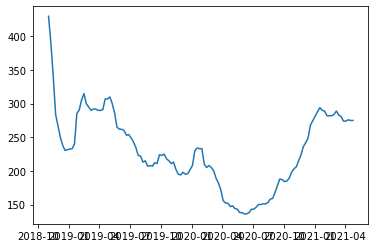

In [26]:
plt.plot(test)

In [27]:
from sklearn.metrics import mean_squared_error
error_arima=np.sqrt(mean_squared_error(test,pred_arima))
error_arima

141.5166483664307

In [28]:
type(data)

pandas.core.frame.DataFrame

In [29]:
test.mean(),np.sqrt(test.var())

(India Price    229.130952
 dtype: float64,
 India Price    56.932387
 dtype: float64)

In [30]:
test['India Price']

Date
2018-11-02    430.0
2018-11-09    390.0
2018-11-16    340.0
2018-11-23    284.0
2018-11-30    267.0
              ...  
2021-03-26    274.0
2021-04-02    274.0
2021-04-09    276.0
2021-04-16    275.0
2021-04-23    275.0
Name: India Price, Length: 126, dtype: float64

In [31]:
df=pd.DataFrame({'Actual Values':test['India Price'],'Forecast Price':pred_arima})

In [32]:
type(test)

pandas.core.frame.DataFrame

In [33]:
type(pred_arima)

pandas.core.series.Series

In [34]:
pred_arima

Date
2018-11-02    445.935067
2018-11-09    443.232471
2018-11-16    440.586258
2018-11-23    437.995250
2018-11-30    435.458296
                 ...    
2021-03-26    326.494448
2021-04-02    326.283641
2021-04-09    326.077232
2021-04-16    325.875129
2021-04-23    325.677242
Length: 126, dtype: float64

In [35]:
test.head()

,India Price
Date,
2018-11-02,430.0
2018-11-09,390.0
2018-11-16,340.0
2018-11-23,284.0
2018-11-30,267.0


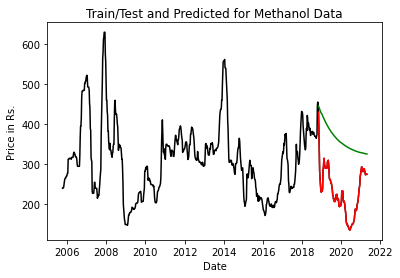

In [36]:
plt.plot(data,color='black')
plt.plot(test,color='red')
plt.plot(pred_arima,color='green')
plt.xlabel('Date')
plt.ylabel('Price in Rs.')
plt.title('Train/Test and Predicted for Methanol Data')
plt.show()

In [37]:
df

,Actual Values,Forecast Price
Date,,
2018-11-02,430.0,445.935067
2018-11-09,390.0,443.232471
2018-11-16,340.0,440.586258
2018-11-23,284.0,437.995250
2018-11-30,267.0,435.458296
...,...,...
2021-03-26,274.0,326.494448
2021-04-02,274.0,326.283641
2021-04-09,276.0,326.077232


In [38]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [39]:
y = train['India Price']

In [40]:
ARMAmodel = SARIMAX(y, order = (1, 0, 1))

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [41]:
ARMAmodel = ARMAmodel.fit()
pred_arma=ARMAmodel.predict(start=len(train),end=(len(data)-1))
pred_arma.index=test.index

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [42]:
pred_arma.head()

Date
2018-11-02    447.521175
2018-11-09    446.880395
2018-11-16    446.240532
2018-11-23    445.601585
2018-11-30    444.963553
Name: predicted_mean, dtype: float64

In [43]:
from sklearn.metrics import mean_squared_error
error_arma=np.sqrt(mean_squared_error(test,pred_arma))
error_arma

188.14862820999238

In [44]:
df=pd.DataFrame({'Actual Values':test['India Price'],'Forecast Price':pred_arma})

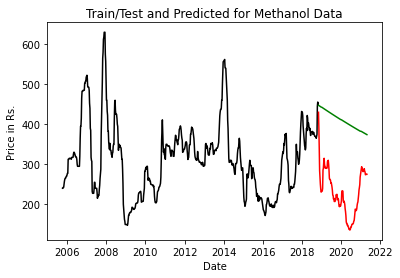

In [46]:

plt.plot(train,color='black')
plt.plot(test,color='red')
plt.plot(pred_arma,color='green')
plt.xlabel('Date')
plt.ylabel('Price in Rs.')
plt.title('Train/Test and Predicted for Methanol Data')
plt.show()

In [47]:
df

,Actual Values,Forecast Price
Date,,
2018-11-02,430.0,447.521175
2018-11-09,390.0,446.880395
2018-11-16,340.0,446.240532
2018-11-23,284.0,445.601585
2018-11-30,267.0,444.963553
...,...,...
2021-03-26,274.0,376.284914
2021-04-02,274.0,375.746133
2021-04-09,276.0,375.208123


In [48]:
rollmean=data.rolling(window=4).mean()
rollstd=data.rolling(window=4).std()

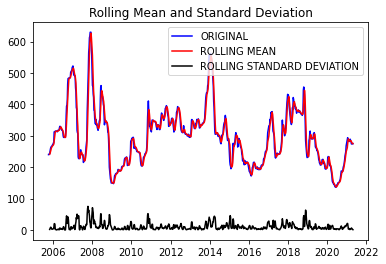

In [49]:
original=plt.plot(data,color='blue',label='ORIGINAL')
mean=plt.plot(rollmean,color='red',label='ROLLING MEAN')
std=plt.plot(rollstd,color='black',label='ROLLING STANDARD DEVIATION')
plt.legend(loc='best') # LOCATION OF THE LEGEND
plt.title('Rolling Mean and Standard Deviation')
plt.show(block=False)

In [50]:
import statsmodels.api as sm
sarima_model=sm.tsa.statespace.SARIMAX(train,order=(1,2,1),seasonal_order=(1,2,1,12),enforce_stationary=True).fit()

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [51]:
pred_sarima=sarima_model.predict(start=len(train),end=(len(data)-1))
pred_sarima.index=test.index

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [52]:
pred_sarima.head()

Date
2018-11-02    454.711532
2018-11-09    467.045554
2018-11-16    472.931751
2018-11-23    479.791980
2018-11-30    493.730391
Name: predicted_mean, dtype: float64

In [53]:
df=pd.DataFrame({'Actual Values':test['India Price'],'Forecast Price':pred_sarima})

In [54]:
from sklearn.metrics import mean_squared_error
error_sarima=np.sqrt(mean_squared_error(test,pred_sarima))
error_sarima

3345.02925804711

In [55]:
df

,Actual Values,Forecast Price
Date,,
2018-11-02,430.0,454.711532
2018-11-09,390.0,467.045554
2018-11-16,340.0,472.931751
2018-11-23,284.0,479.791980
2018-11-30,267.0,493.730391
...,...,...
2021-03-26,274.0,6803.061422
2021-04-02,274.0,6891.831692
2021-04-09,276.0,6983.262095


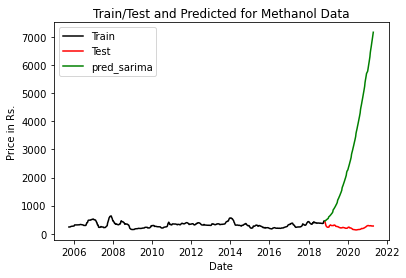

In [56]:
plt.plot(train,label='Train',color='black')
plt.plot(test,label='Test',color='red')
plt.plot(pred_sarima,label='pred_sarima',color='green')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price in Rs.')
plt.title('Train/Test and Predicted for Methanol Data')
plt.show()

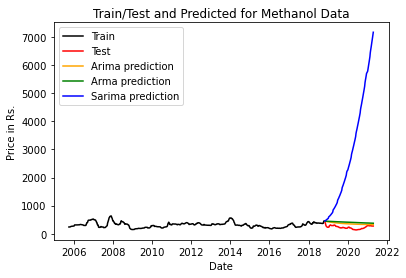

In [57]:
plt.plot(train,label='Train',color='black')
plt.plot(test,label='Test',color='red')
plt.plot(pred_arima,label='Arima prediction',color='orange')
plt.plot(pred_arma,label='Arma prediction',color='green')
plt.plot(pred_sarima,label='Sarima prediction',color='blue')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price in Rs.')
plt.title('Train/Test and Predicted for Methanol Data')
plt.show()

In [58]:
print(error_arima)

141.5166483664307


In [62]:
print(error_arma)
print(error_sarima)

188.14862820999238
3345.02925804711
